# <center><b>Modelización y Predicción de la Contratación de Servicios utilizando MAP@K<b/></center>

![Texto alternativo](https://www.fisagrp.com/assets/_/images/blog/last/siete-recomendaciones-elegir-tecnologia-banco-herramientas-plataforma.jpg)


Una empresa pone a disposición de sus clientes 25 productos distintos. Los clientes pueden contratar cualquiera de los productos, pero solo pueden tener un producto activo de cada tipología. Es decir:
* Un cliente puede tener activos los productos“1”,“2”,”6”y“22”peronopuedeteneractivosdosomásproductos- Por ejemplo, no puede tener activos dos productos “6”.
* Un cliente como máximo puede tener activos 25 productos,es decir,uno por tipología.
* Un cliente como mínimo puede tener activos  0productos.

Los productos se contratan para un periodo de un mes y los contratos se puede renovar de forma indefinida cada mes.
Se comparte una serie de datos que hacen referencia a las características asociadas a los clientes (features) y 25 columnas que nos indican si tienen activo o no un producto (targets) para cada mes. Un cliente puede hacer tres cosas con cada producto:
* Contratar el producto,si el cliente no lo tenía contratado el mes anterior.
* Mantener el producto,si el cliente ya tenía contratado el producto el mes anterior y lo mantiene el mes en curso.
* Cancelar el producto,si el cliente tenía contratado el producto el mes anterior y cancela el producto el mes en curso.

Tenéis que predecir los productos que contratarán los clientes (clientes existentes en el último mes del dato) el próximo mes (asumiendo que todos seguirán siendo clientes). Predecir los productos que se van a contratar no es lo mismo que predecir los productos que se van a usar el próximo mes. Los productos que los clientes usarán el próximo mes serán aquellos que se mantienen o se contratan, y lo que buscamos es predecir estos últimos. No queremos predecir que productos ya contratados en un mes anterior y que los clientes continúan usando.

En definitiva, el proyecto consiste en analizar, explicar, modelar y predecir la contratación de 25 productos por parte de cada cliente. La métrica de error que se usará es el Mean Average Precision at 7 también llamado MAP@7. Se valorará la calidad del informe, las técnicas usadas, la claridad, el ingenio (feature engineering, visualizaciones...) y las métricas de error obtenidas en las predicciones a realizar.

Equipo de Data Scientist de <i>BeastCode</i>:

* Raúl Artigues Femenia

* Francisco Trueba Fernández

* Alenxandre Perez Reina

* Joaquín Joana Azuara

* Alejandro González Monzón

# Importación y carga de librerías

In [ ]:
import pandas as pd
import numpy as np
import datetime
import random
import pandas_profiling

<ipython-input-1-7ab0844743bd>:5: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  import pandas_profiling


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Carga y Lectura de datos

In [ ]:
data= pd.read_csv('/content/drive/MyDrive/dataset_para_modelar (1).csv', sep=',')
data.drop(data.columns[0], axis=1, inplace = True)
data

<ipython-input-3-db4e5d79048b>:1: DtypeWarning: Columns (5,9,11) have mixed types. Specify dtype option on import or set low_memory=False.
  data= pd.read_csv('/content/drive/MyDrive/dataset_para_modelar (1).csv', sep=',')


,cod_persona,mes,pais,sexo,edad,fecha1,xti_empleado,xti_nuevo_cliente,num_antiguedad,xti_rel,...,ind_prod16,ind_prod17,ind_prod18,ind_prod19,ind_prod20,ind_prod21,ind_prod22,ind_prod23,ind_prod24,ind_prod25
0,178103,2015-01-28,ES,H,35,2015-01-12,N,0.0,6,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,503082,2015-01-28,ES,V,27,2012-08-10,N,0.0,35,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,502996,2015-01-28,ES,V,37,2012-08-10,N,0.0,35,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,503053,2015-01-28,ES,H,23,2012-08-10,N,0.0,35,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,503031,2015-01-28,ES,H,44,2012-08-10,N,0.0,35,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82200,168084,2015-03-28,ES,V,36,2015-03-02,N,1.0,5.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
82201,168098,2015-03-28,ES,V,39,2015-03-02,N,1.0,5.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
82202,168106,2015-03-28,ES,H,34,2015-03-02,N,1.0,5.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
82203,168070,2015-03-28,ES,H,35,2015-03-02,N,1.0,5.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Procesamiento de los datos

En el presente apartado se realiza el procesamiento de las Features. Esto incluye cambiar la tipologia, codificación y generación de nuevas variables.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82205 entries, 0 to 82204
Data columns (total 48 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   cod_persona            82205 non-null  int64  
 1   mes                    82205 non-null  object 
 2   pais                   82167 non-null  object 
 3   sexo                   82167 non-null  object 
 4   edad                   82205 non-null  object 
 5   fecha1                 82167 non-null  object 
 6   xti_empleado           82167 non-null  object 
 7   xti_nuevo_cliente      82167 non-null  float64
 8   num_antiguedad         82204 non-null  object 
 9   xti_rel                82166 non-null  float64
 10  fec_ult_cli_1t         4 non-null      object 
 11  xti_rel_1mes           82166 non-null  float64
 12  tip_rel_1mes           82166 non-null  object 
 13  indresi                82166 non-null  object 
 14  indext                 82166 non-null  object 
 15  de

A continuación, se realiza una codificación aquellas variables que son dicotómicas pero con valores de texto. Por tanto, se cambian a valores numéricos para que se pueden utilizar en el modelo de recomendación de los 25 productos bancarios.

In [ ]:
from sklearn.preprocessing import LabelEncoder
# Inicializar el codificador de etiquetas
label_encoder = LabelEncoder()

data['pais'] = label_encoder.fit_transform(data['pais'])
data['sexo'] = label_encoder.fit_transform(data['sexo'])
data['xti_empleado'] = label_encoder.fit_transform(data['xti_empleado'])
data['tip_rel_1mes'] = label_encoder.fit_transform(data['tip_rel_1mes'])
data['indresi'] = label_encoder.fit_transform(data['indresi'])
data['indext'] = label_encoder.fit_transform(data['indext'])
data['des_canal'] = label_encoder.fit_transform(data['des_canal'])
data['xti_extra'] = label_encoder.fit_transform(data['xti_extra'])
data['id_segmento'] = label_encoder.fit_transform(data['id_segmento'])

Además, la tipologia de las variables *mes*, *fecha1* y *fec_ult_cli_17* se cambia a formato *DateTime*.

In [ ]:
data['mes'] = pd.to_datetime(data['mes'])
data['fecha1'] = pd.to_datetime(data['fecha1'])
data['fec_ult_cli_1t'] = pd.to_datetime(data['fec_ult_cli_1t'])

## Valores duplicados

Se identifica si existen filas duplicadas dentro del data set.

In [ ]:
dups = data.duplicated()
#Se listan las filas duplicadas
print(data[dups])

Empty DataFrame
Columns: [cod_persona, mes, pais, sexo, edad, fecha1, xti_empleado, xti_nuevo_cliente, num_antiguedad, xti_rel, fec_ult_cli_1t, xti_rel_1mes, tip_rel_1mes, indresi, indext, des_canal, xti_extra, tip_dom, cod_provincia, xti_actividad_cliente, imp_renta, id_segmento, mean_engagement, ind_prod1, ind_prod2, ind_prod3, ind_prod4, ind_prod5, ind_prod6, ind_prod7, ind_prod8, ind_prod9, ind_prod10, ind_prod11, ind_prod12, ind_prod13, ind_prod14, ind_prod15, ind_prod16, ind_prod17, ind_prod18, ind_prod19, ind_prod20, ind_prod21, ind_prod22, ind_prod23, ind_prod24, ind_prod25]
Index: []

[0 rows x 48 columns]


No existen registros duplicados. Pero para verificarlo, a continuación se muestra en número de registros antes y después de llamar a la función *duplicado*.

In [ ]:
print("Dimensiones antes de eliminar filas duplicadas: ",data.shape)
# delete duplicate rows
data.drop_duplicates(inplace=True)
print("Dimensiones después de eliminar filas duplicadas: ",data.shape)

Dimensiones antes de eliminar filas duplicadas:  (82205, 48)
Dimensiones después de eliminar filas duplicadas:  (82205, 48)


## Identificación de variables con valores únicos

A continuación se muestras los valores únicos de las variables que no hacen referencia a la relación entre los productos bancarios y los usuarios/clientes.

In [ ]:
for i in data.columns[:23]:
  print(i, len(data[i].unique()))

cod_persona 31149
mes 3
pais 46
sexo 3
edad 149
fecha1 5175
xti_empleado 5
xti_nuevo_cliente 3
num_antiguedad 250
xti_rel 3
fec_ult_cli_1t 3
xti_rel_1mes 2
tip_rel_1mes 3
indresi 3
indext 3
des_canal 115
xti_extra 3
tip_dom 2
cod_provincia 53
xti_actividad_cliente 3
imp_renta 25445
id_segmento 4
mean_engagement 106


No existen valores únicos. De todas formas se crea un código que elimina aquellos 25 primeros atributos que tengan registros únicos.

In [ ]:
print("Cantidad columnas originales:",data.shape[1])

for i in data.columns[:23]:
  if len(data[i].unique())==1:
    print("Columna a eliminar:" , data[i].name , "por tener un único valor")
    data.drop(i, axis=1, inplace=True)

print("Cantidad columnas final:",data.shape[1])

Cantidad columnas originales: 48
Cantidad columnas final: 48


## Valores Outliers

En este apartado se va a analizar los valores atípicos de todas las variables del conjunto de datos. Si existen este tipo de registros, se sustituiran por 1.5*IQR.

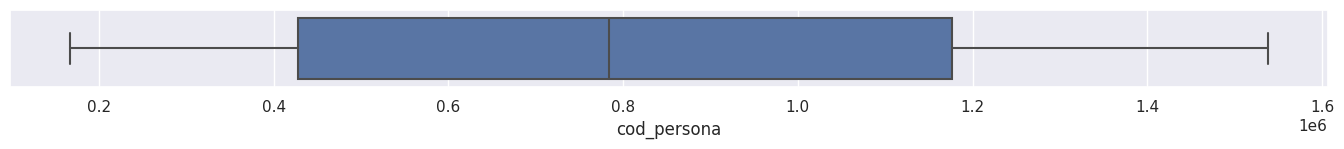

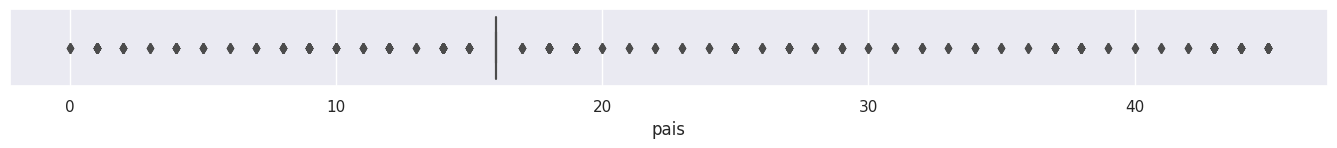

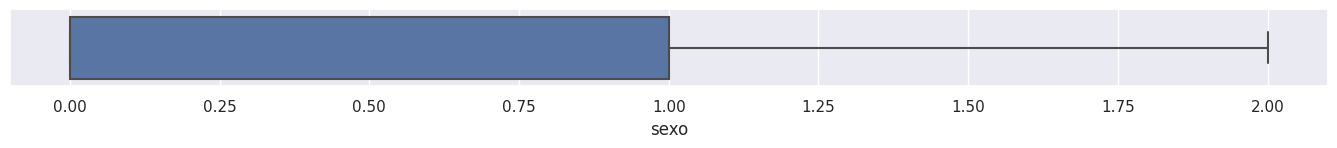

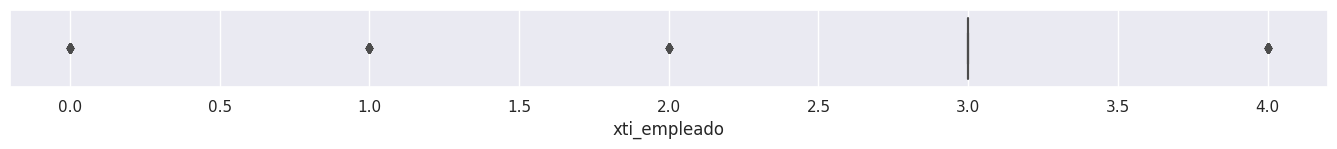

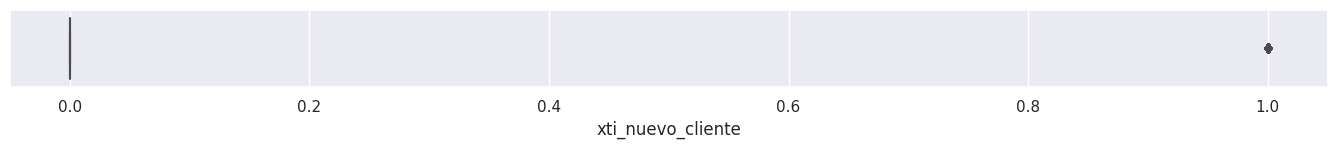

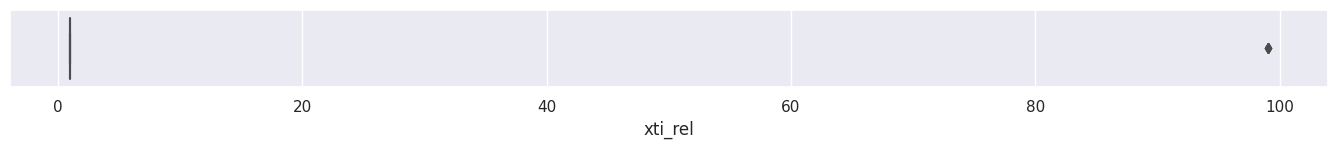

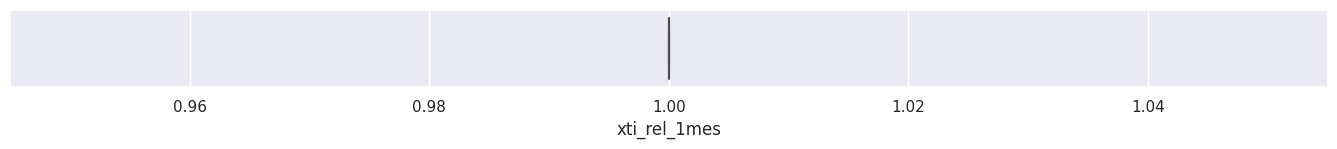

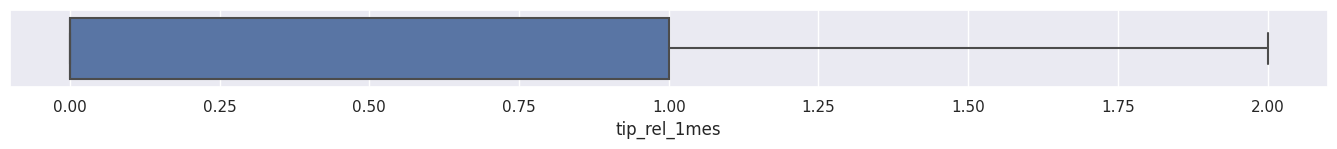

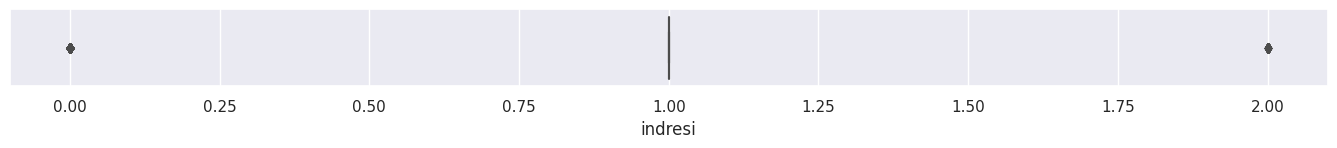

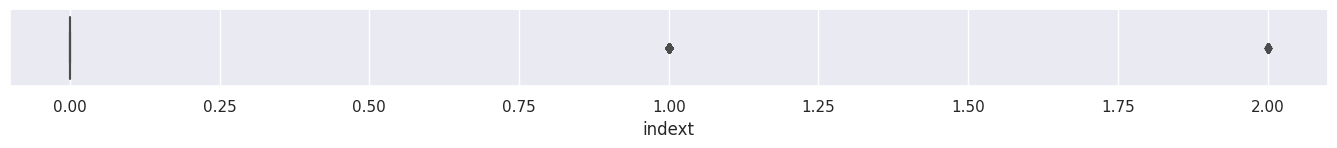

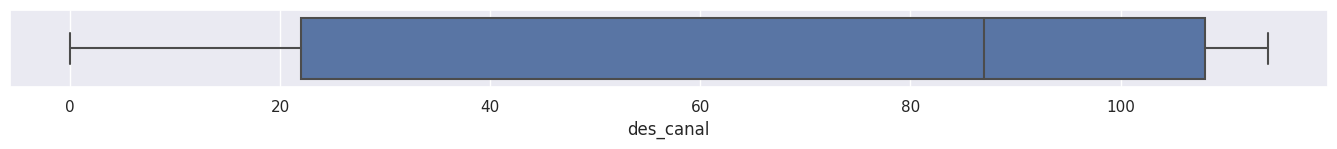

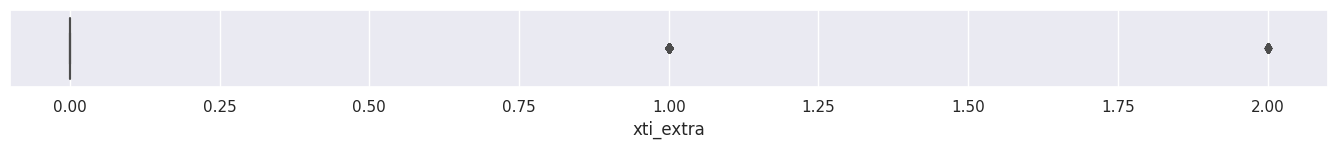

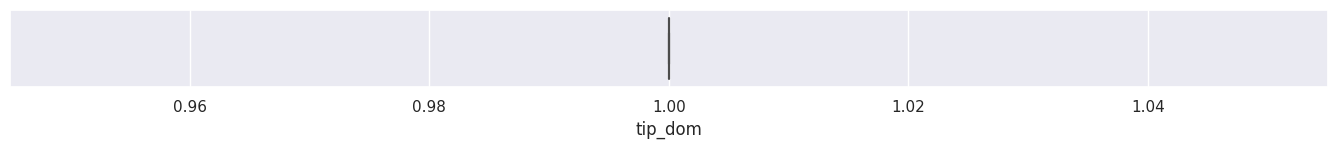

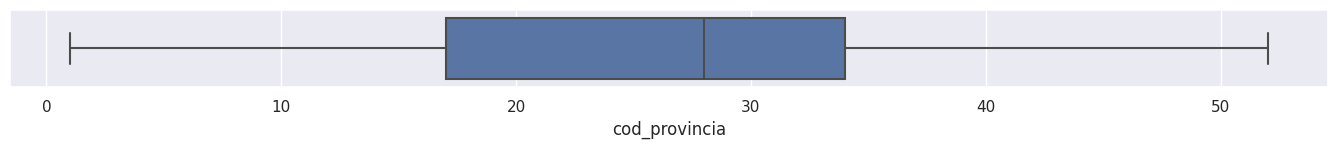

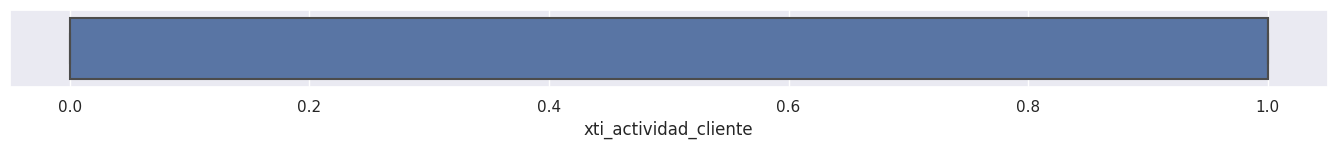

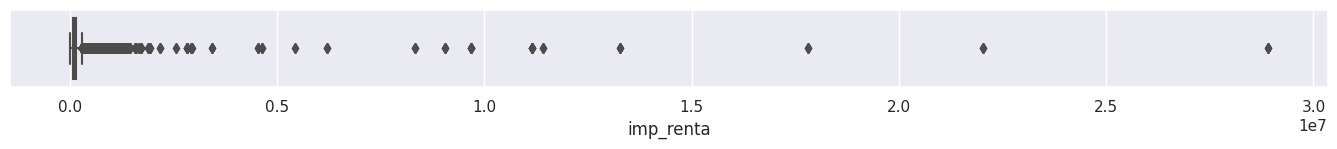

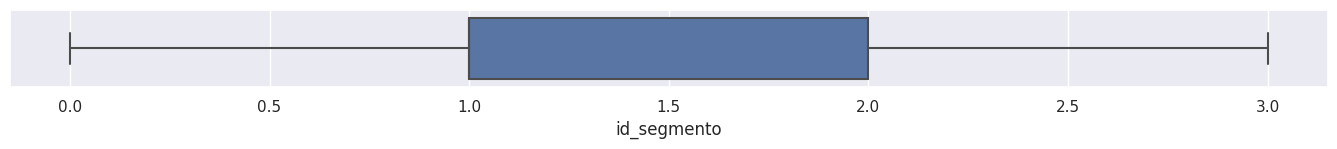

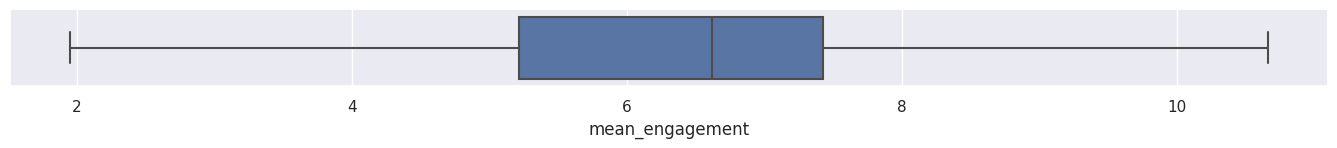

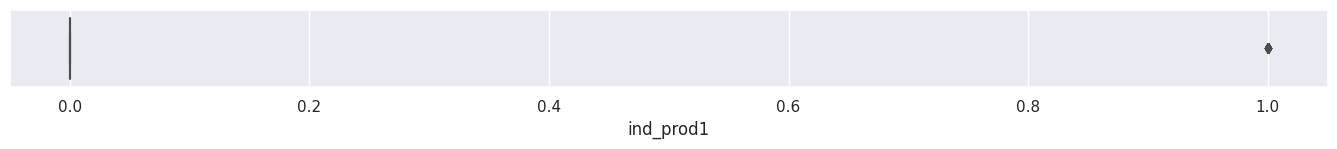

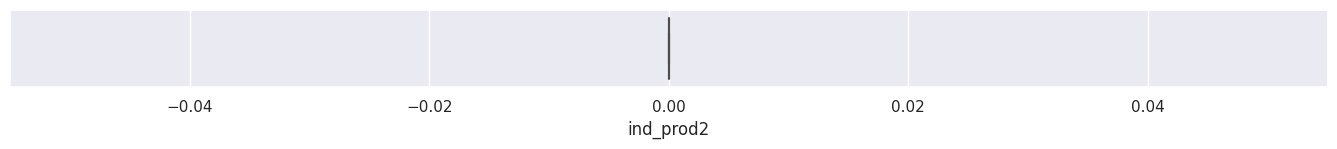

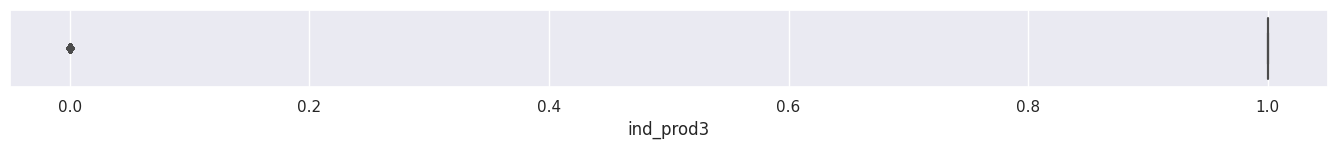

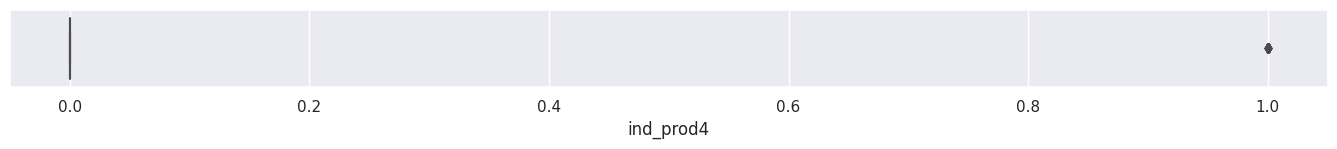

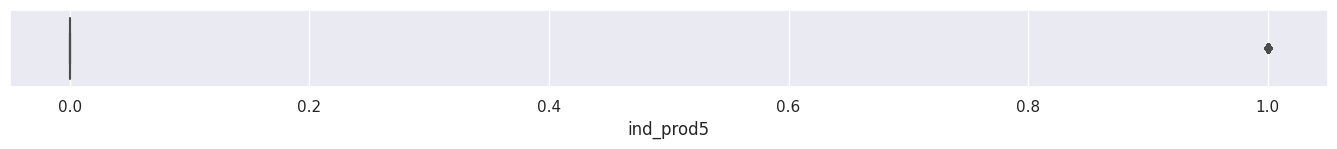

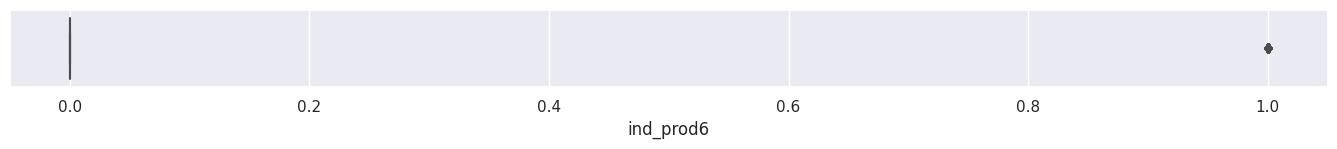

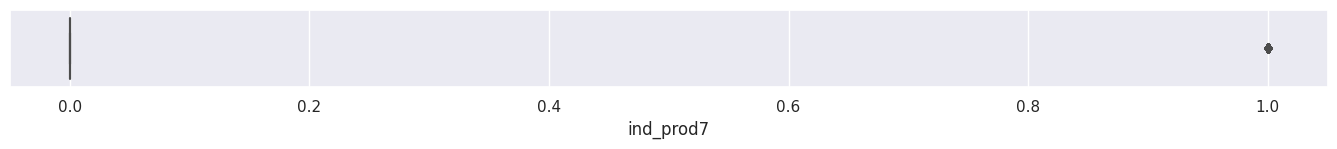

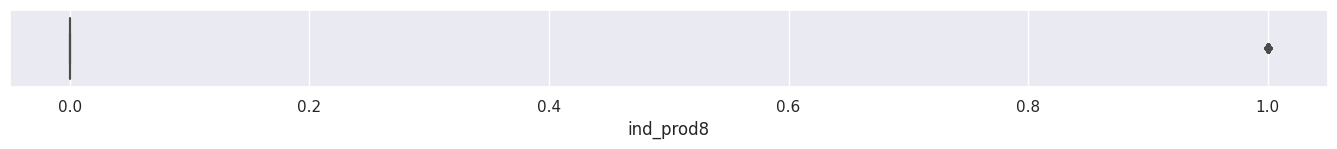

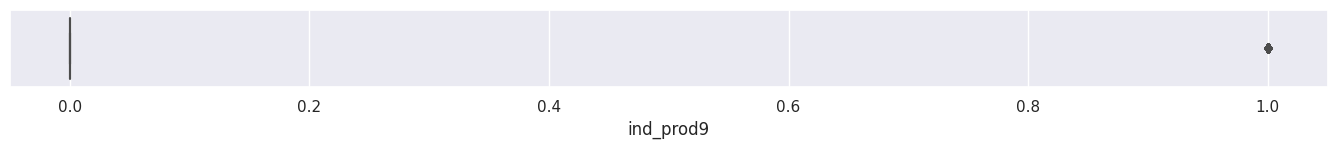

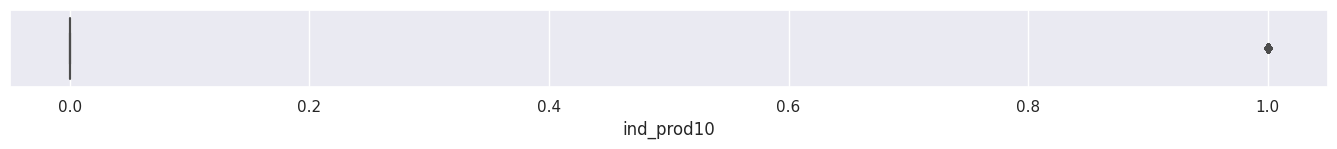

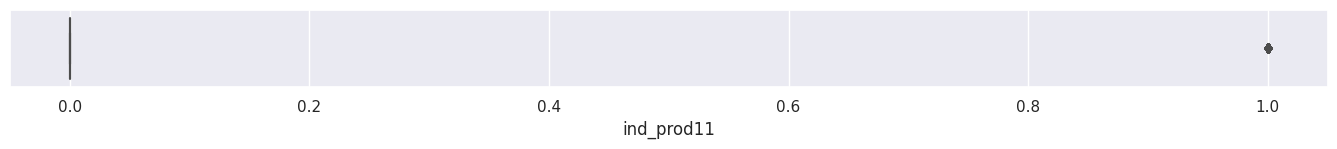

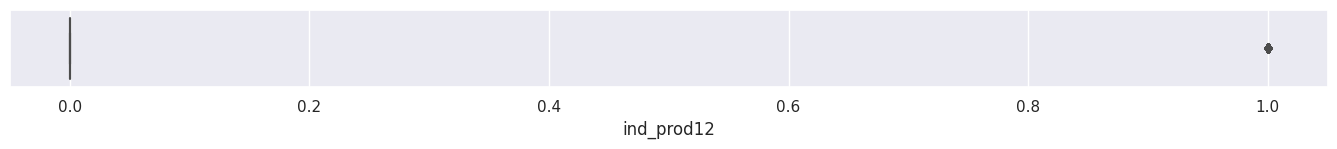

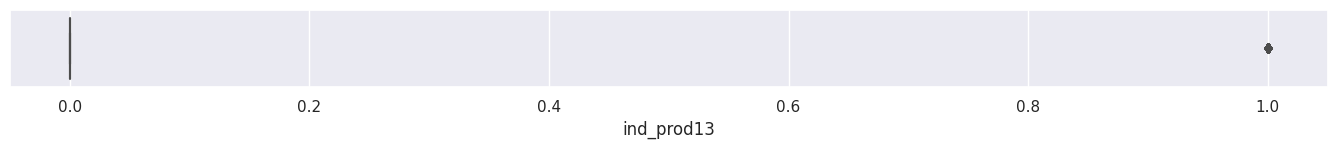

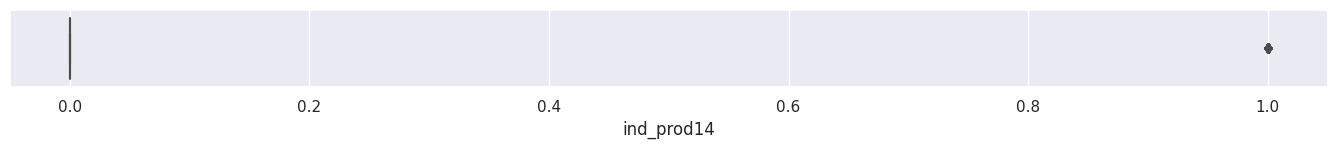

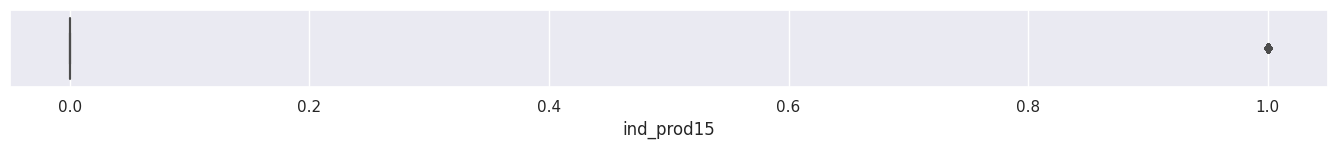

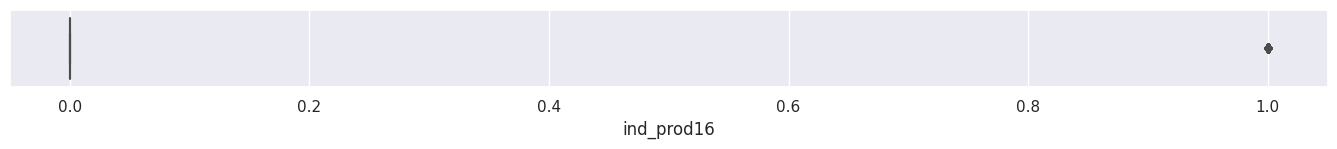

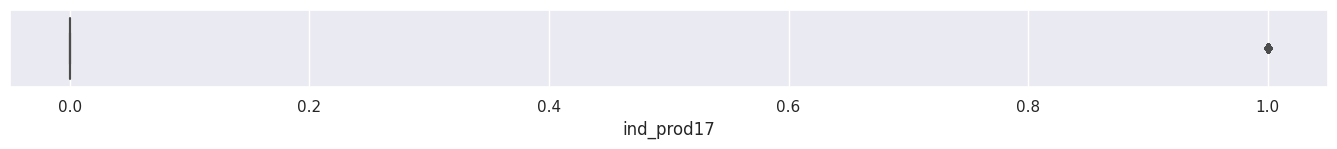

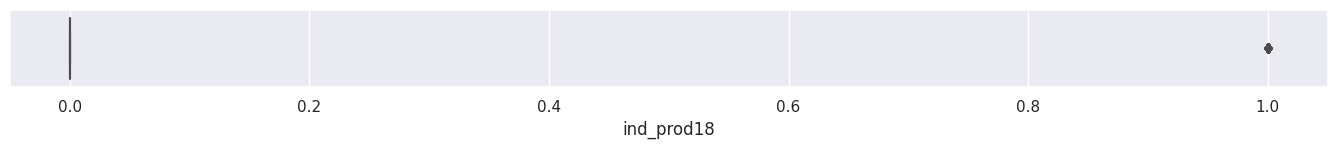

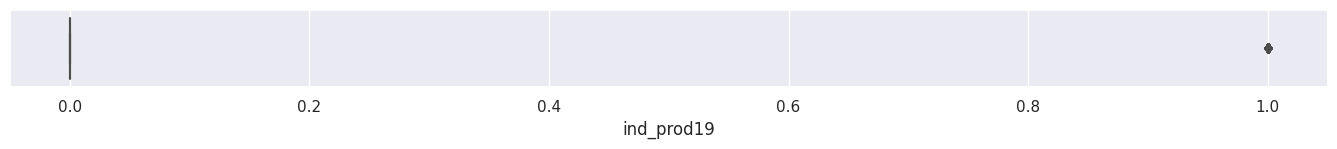

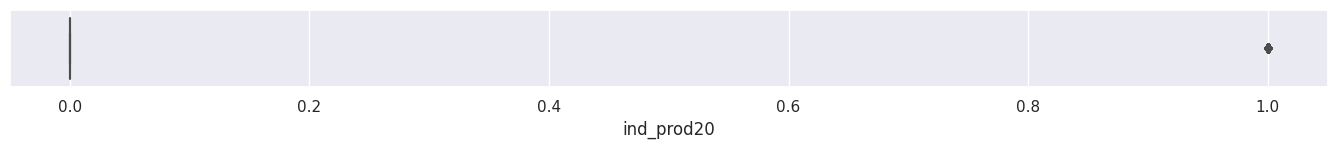

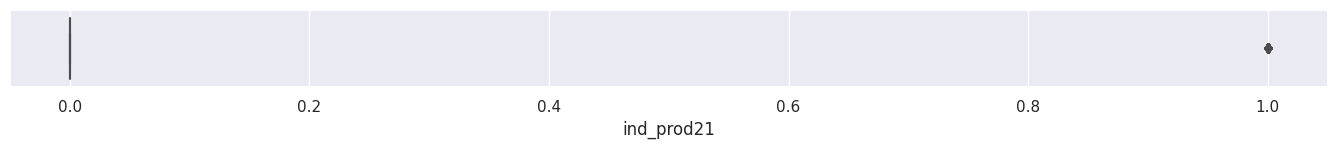

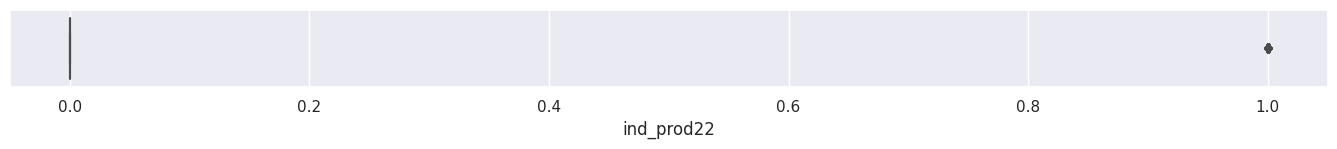

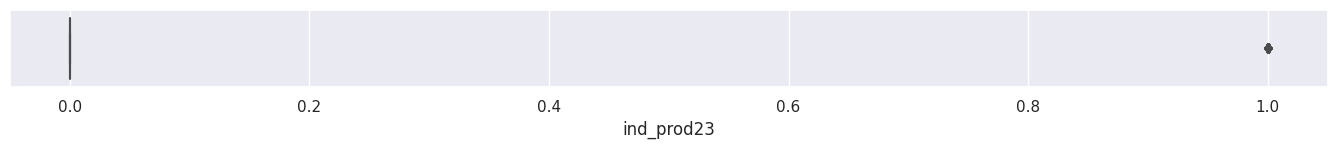

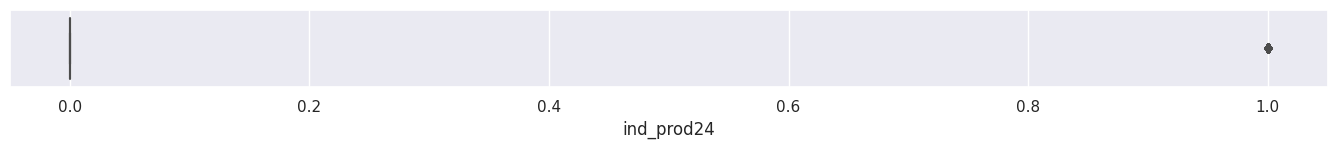

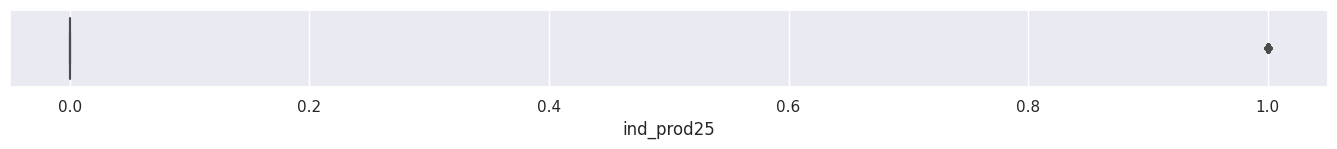

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


sns.set() #Restablece la configuración de valores predeterminados
plt.rcParams.update({'figure.max_open_warning': 0})

for column in data:
  if (data[column].dtype == 'float64' or data[column].dtype == 'int64'):
        plt.figure(figsize=(17,1))
        sns.boxplot(data=data, x=column)

Mediante los gráficos anteriores, se puede observar que aquellas variables que contienen valores outliers: tip_rel_1mes, mean_engagement

Se puede utilizar el método IQR para identificar valores atípicos para establecer una "cerca" fuera del Q1 y Q3. Cualquier valor que caiga fuera de esta valla se considera atípico. Para construir esta valla se toma 1,5 veces el IQR y luego restamos este valor del Q1 y añadimos este valor al Q3. Esto nos da los postes de cerca mínimos y máximos con los que comparamos cada observación.

<b>Tratamientos de los outliers</b>

Metodo: **Interquartile Range**

Se aplicará el método del rango intercuartílico (IQR, por sus siglas en inglés) para filtrar los valores atípicos de las variables del problema.

El IQR se calcula como la diferencia entre el percentil 75 y el percentil 25 de los datos y se utiliza para identificar los valores atípicos, que serán filtrados posteriormente.

Inicialmente, se definirá el umbral k en 1.5, ya que es un valor comúnmente utilizado para este parámetro. Este umbral es utilizado para crear límites superiores e inferiores para los datos. Los valores que se encuentren fuera de estos límites se considerarán valores atípicos y serán excluidos del análisis.

In [ ]:
import numpy as np
import pandas as pd

# Se define la función que permite eliminar outliers para cierto valor de k
def eliminar_outlier(col, k=1.5):
    Q1 = col.quantile(0.25)
    Q3 = col.quantile(0.75)
    IQR = Q3 - Q1
    lower_thr = Q1 - (k * IQR)  # Umbral inferior
    upper_thr = Q3 + (k * IQR)  # Umbral superior
    col = col.where((col >= lower_thr) & (col <= upper_thr))
    col = col.fillna(col.mean())
    return col

In [ ]:
# Código para aplicar la función a las columnas deseadas
cols_to_process = ["tip_rel_1mes", "mean_engagement"]
data[cols_to_process] = data[cols_to_process].apply(eliminar_outlier)

<b>Situación Final: diagrama de cajas</b>
Se comprueba en el diagrama de cajas que el filtrado se ha realizado exitosamente.

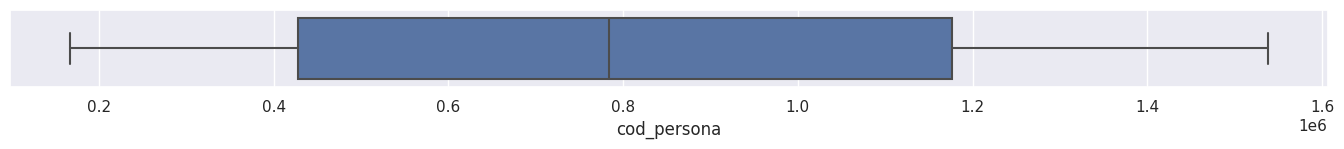

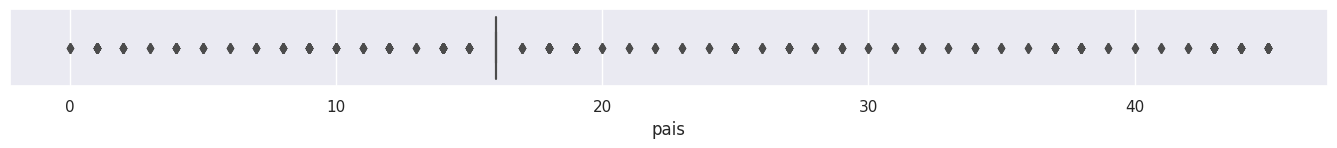

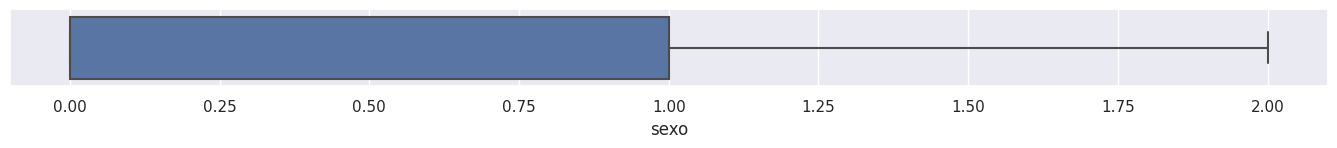

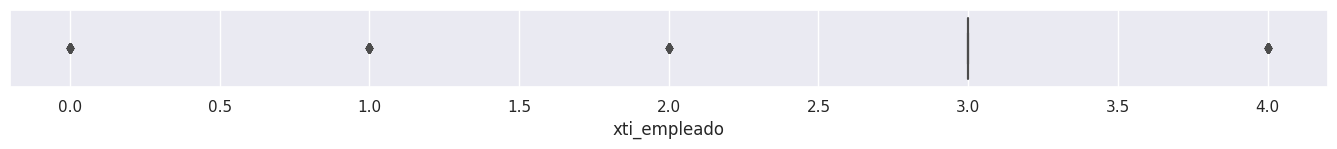

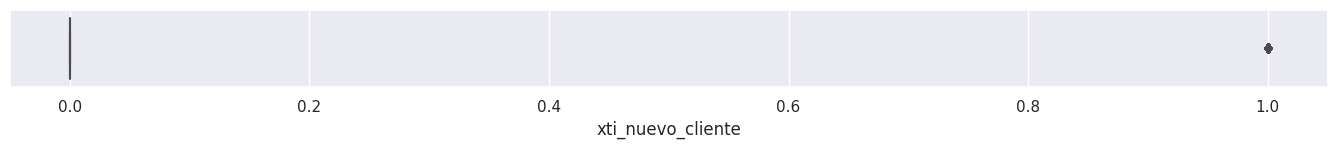

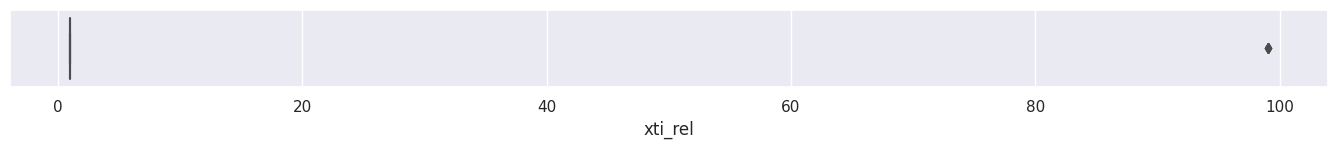

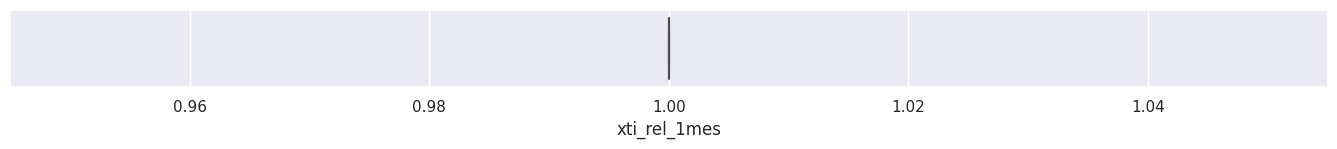

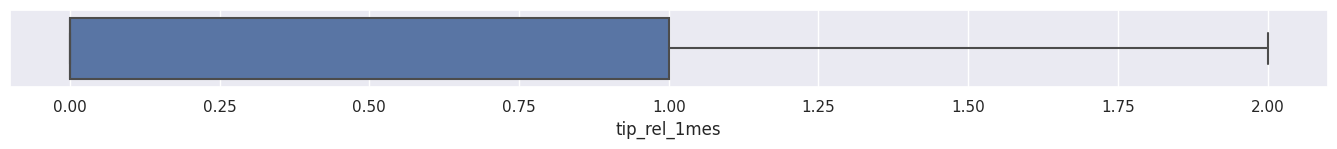

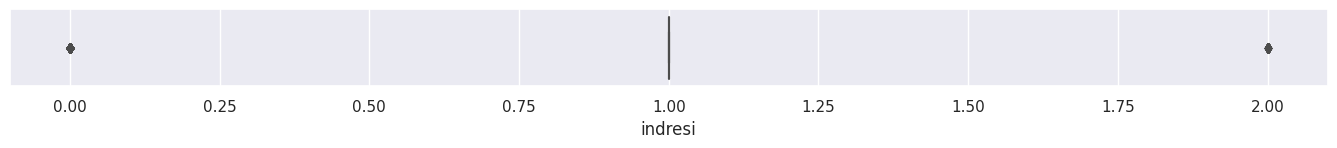

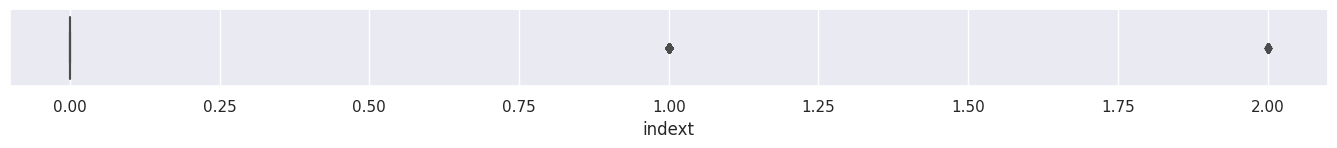

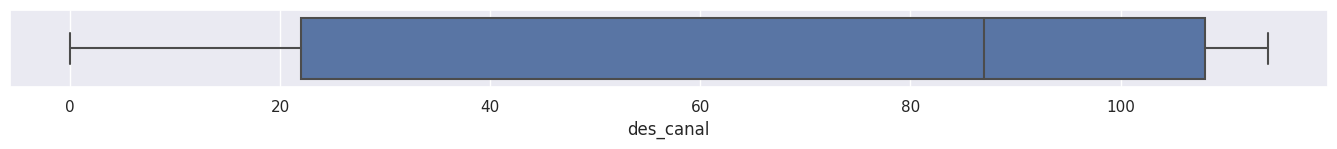

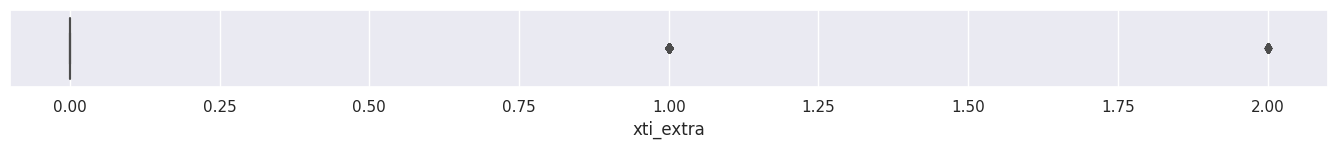

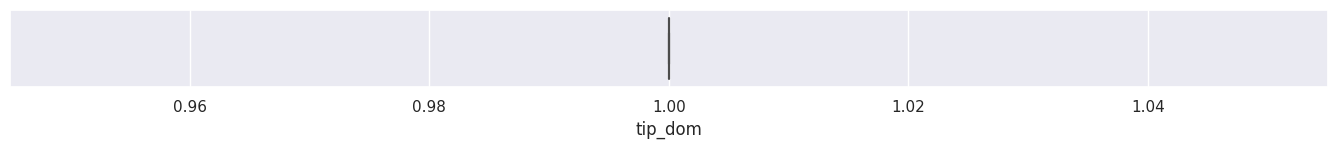

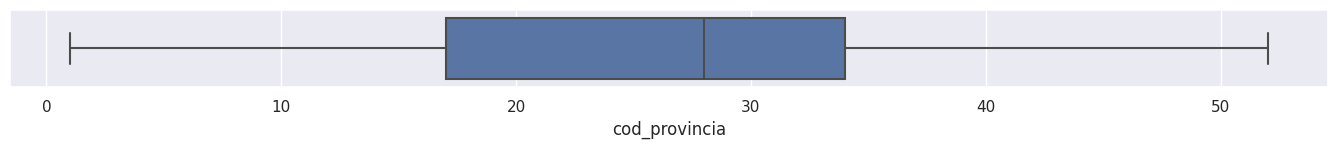

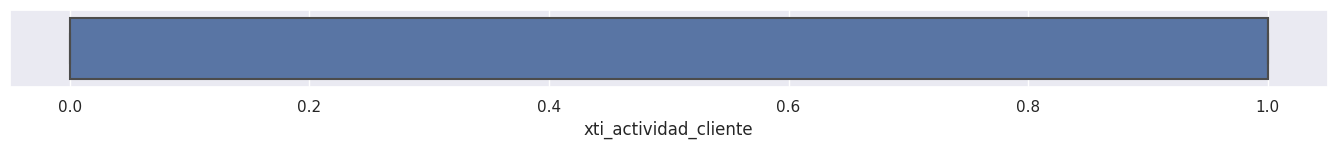

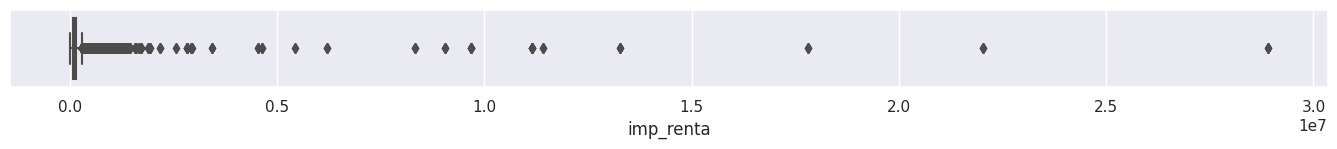

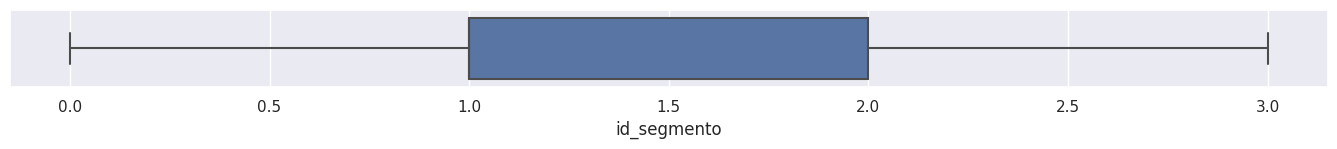

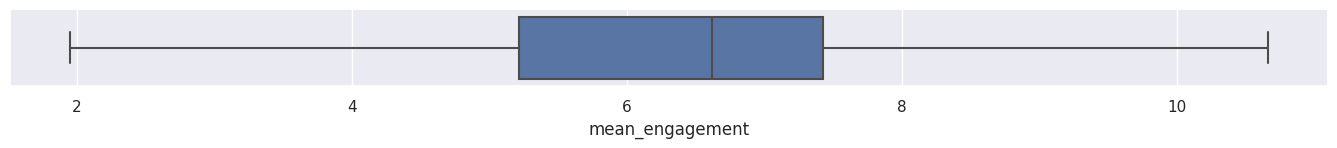

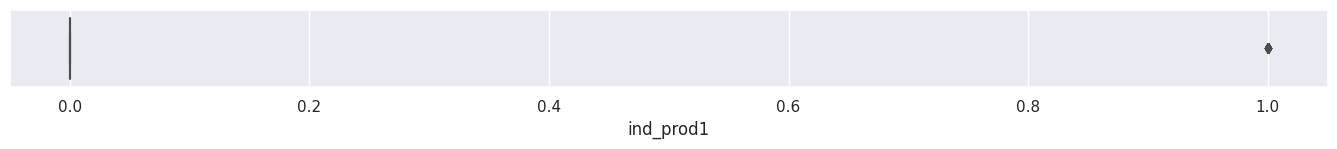

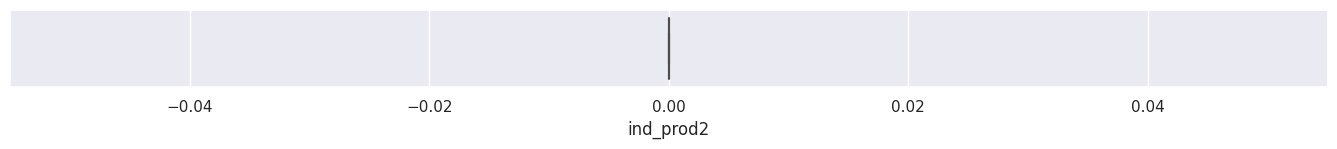

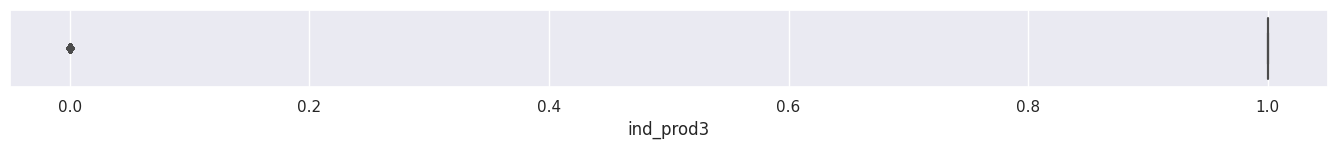

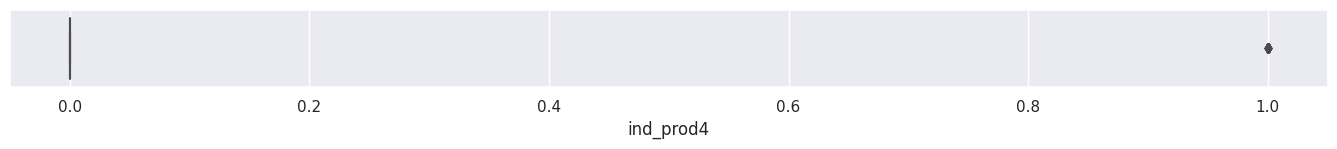

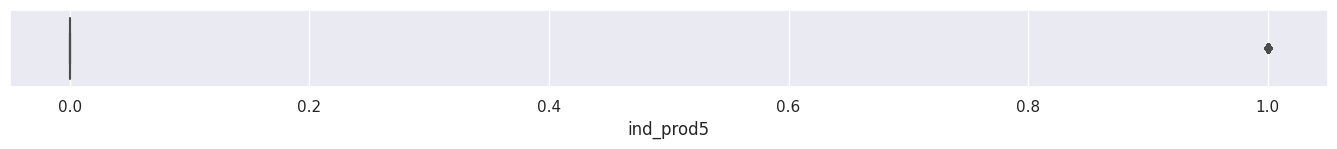

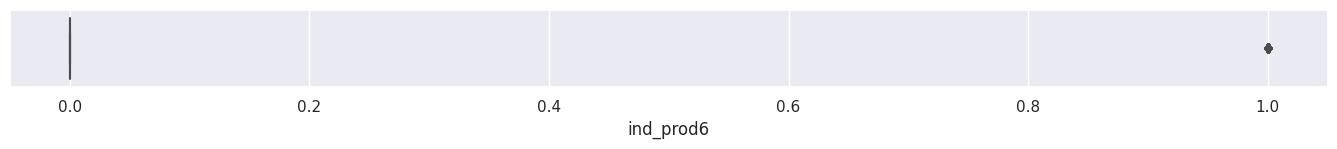

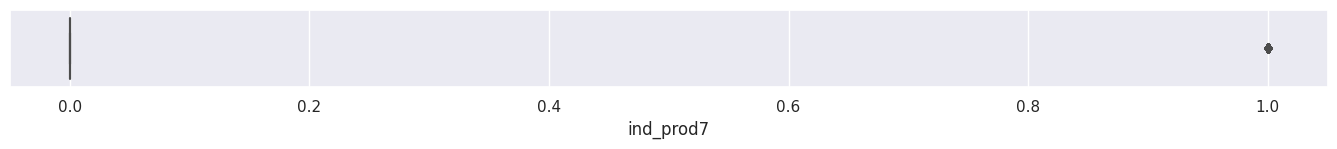

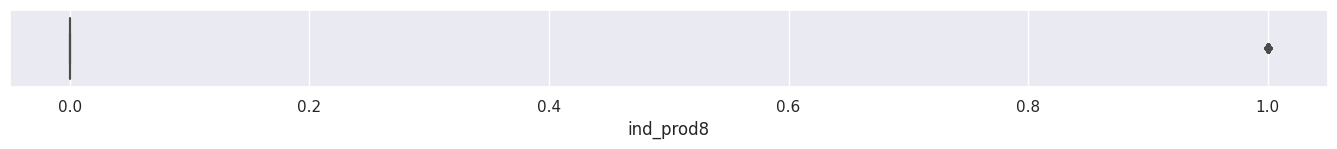

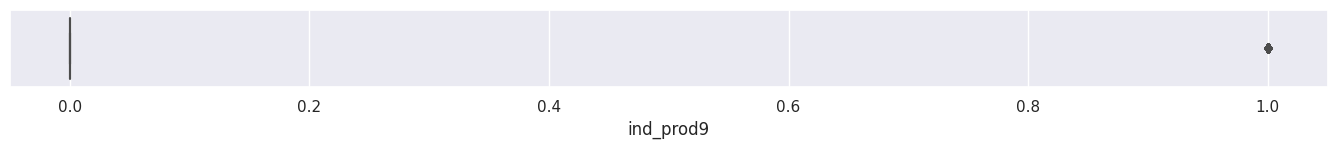

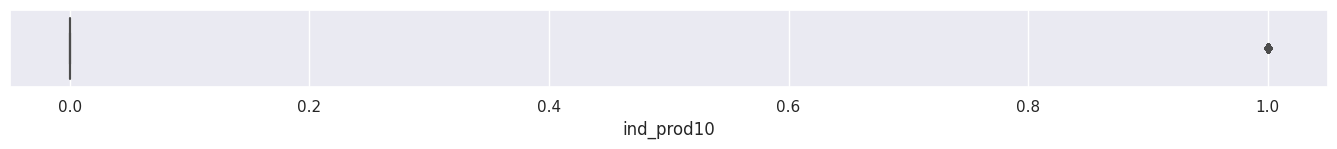

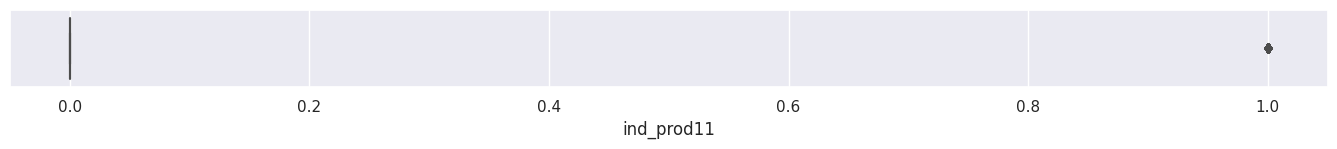

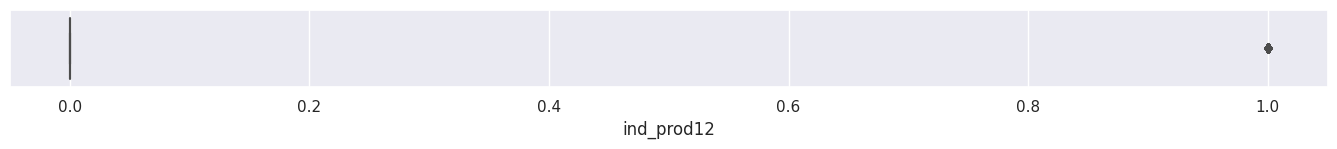

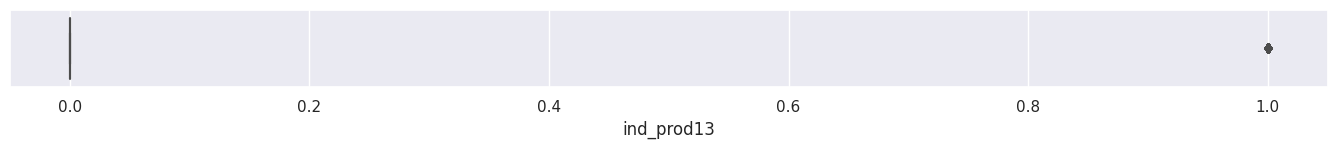

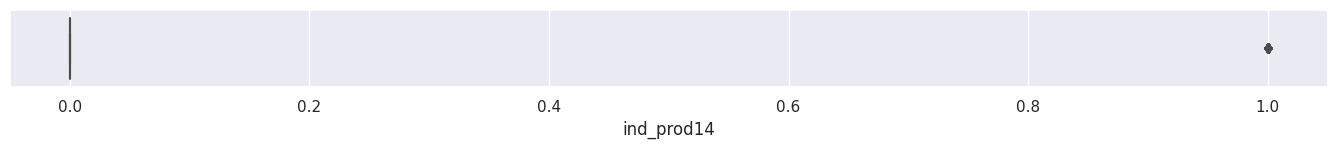

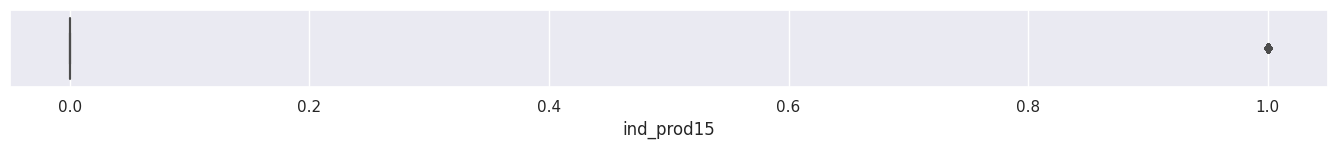

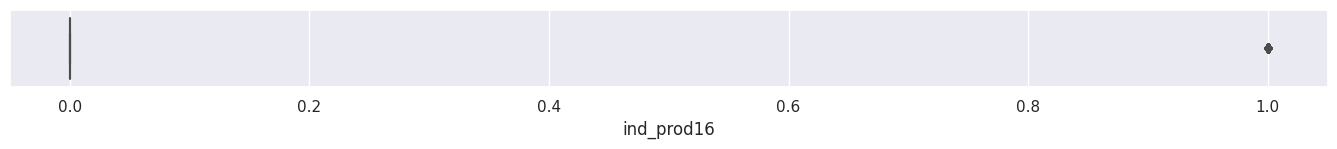

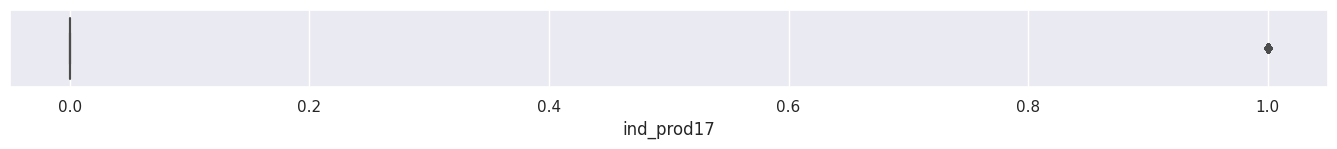

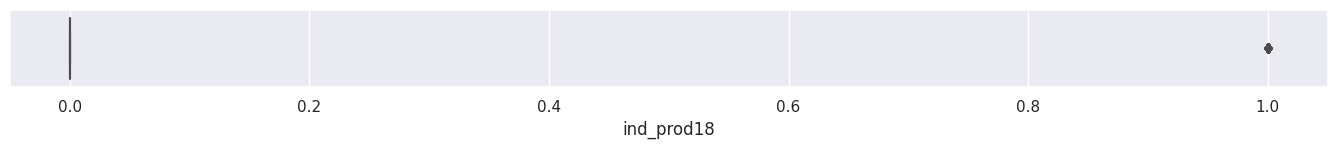

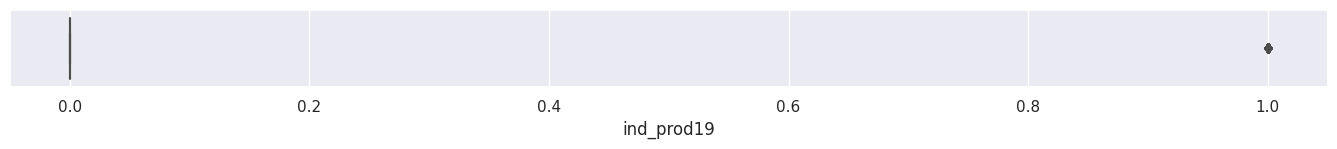

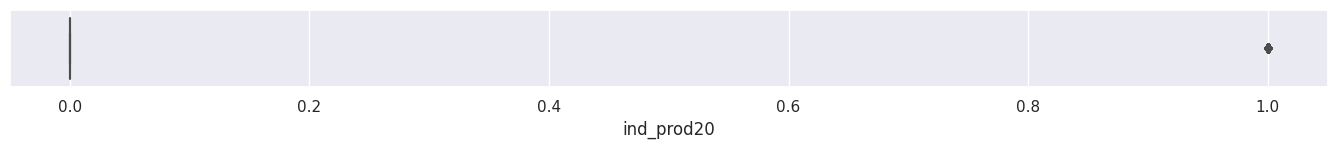

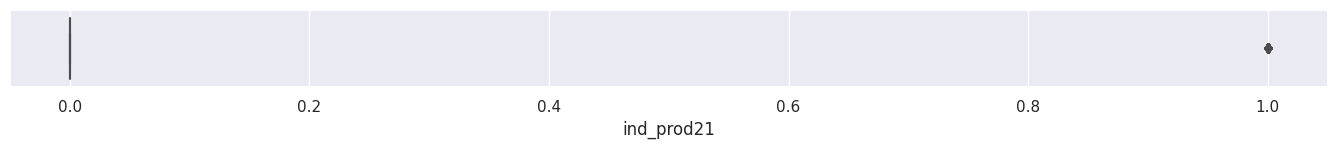

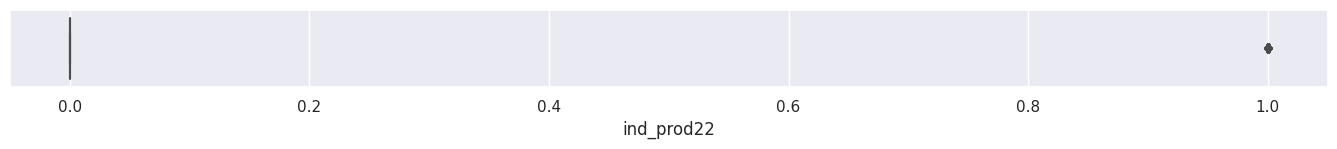

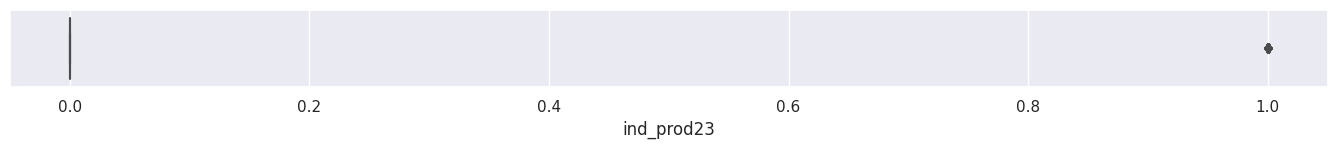

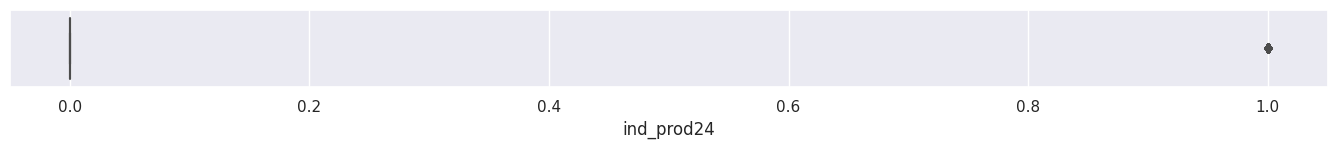

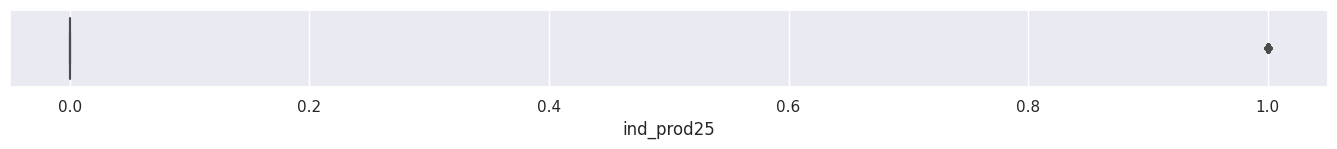

In [ ]:
sns.set() #Restablece la configuración de valores predeterminados
plt.rcParams.update({'figure.max_open_warning': 0})

for column in data:
  if (data[column].dtype == 'float64' or data[column].dtype == 'int64'):
        plt.figure(figsize=(17,1))
        sns.boxplot(data=data, x=column)

## Valores Nulos

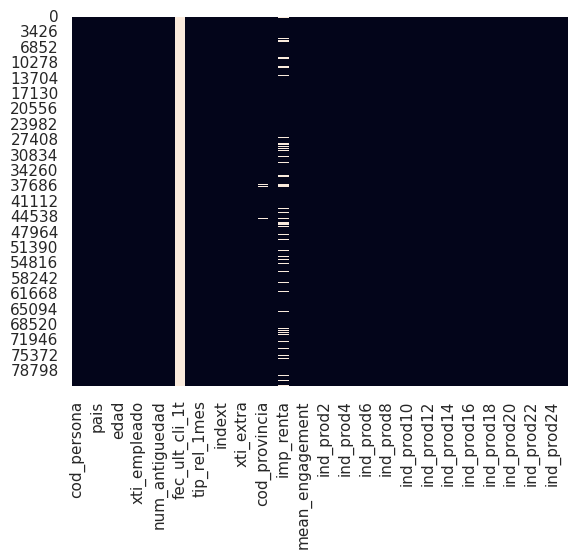

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()  # Establecemos una estética especifíca para la gráfica, en este caso, por defecto

sns.heatmap(data.isnull(), cbar=False)  # Creamos un mapa de calor para detectar los valores nulos
plt.show()  # Mostramos el gráfico

Se muestran la cantidad de valores nulos (si existen) de la totalidad de las variables del Dataset

In [ ]:
#cuenta el % de nulos de cada columna
for i in data.columns:
  # count number of rows with missing values
  n_miss = data[i].isnull().sum()
  perc = n_miss / data.shape[0] * 100

  print('> %s, Missing: %d (%.1f%%)' % (i, n_miss, perc))

> cod_persona, Missing: 0 (0.0%)
> mes, Missing: 0 (0.0%)
> pais, Missing: 0 (0.0%)
> sexo, Missing: 0 (0.0%)
> edad, Missing: 0 (0.0%)
> fecha1, Missing: 38 (0.0%)
> xti_empleado, Missing: 0 (0.0%)
> xti_nuevo_cliente, Missing: 38 (0.0%)
> num_antiguedad, Missing: 1 (0.0%)
> xti_rel, Missing: 39 (0.0%)
> fec_ult_cli_1t, Missing: 82201 (100.0%)
> xti_rel_1mes, Missing: 39 (0.0%)
> tip_rel_1mes, Missing: 0 (0.0%)
> indresi, Missing: 0 (0.0%)
> indext, Missing: 0 (0.0%)
> des_canal, Missing: 0 (0.0%)
> xti_extra, Missing: 0 (0.0%)
> tip_dom, Missing: 39 (0.0%)
> cod_provincia, Missing: 528 (0.6%)
> xti_actividad_cliente, Missing: 39 (0.0%)
> imp_renta, Missing: 13324 (16.2%)
> id_segmento, Missing: 0 (0.0%)
> mean_engagement, Missing: 0 (0.0%)
> ind_prod1, Missing: 1 (0.0%)
> ind_prod2, Missing: 1 (0.0%)
> ind_prod3, Missing: 1 (0.0%)
> ind_prod4, Missing: 1 (0.0%)
> ind_prod5, Missing: 1 (0.0%)
> ind_prod6, Missing: 1 (0.0%)
> ind_prod7, Missing: 1 (0.0%)
> ind_prod8, Missing: 1 (0.0%)


### Tratamiento de la variable Fecha última de cliente primordial

Esta variable indica el último mes que los clientes han sido primordiales. Si este campo contiene un valor significa que ya no son compradores principales. Y si no tienen registro lo contrario.

Para el tratamiento de esta variable cabe matizar que se entiendo como fecha de hoy la fecha más alta que el dataset:

<center><b><i>max(fecha1)</i>, donde <i>fecha1</i> es la fecha de la primera contratación primordial.</b></center>

* Si resulta que el registro <i>n</i> no tiene valor se le asigna un valor de 0 ya que se calcula la diferencia de la fecha de hoy y la fecha existente.

* La otra casuística que se da es cuando si exista valor en la fila correspondiente. En este caso se calcula la diferencia entre la fecha de hoy y la fecha de baja.

In [ ]:
data['fec_ult_cli_1t'].unique()

array([                          'NaT', '2015-07-30T00:00:00.000000000',
       '2015-07-28T00:00:00.000000000'], dtype='datetime64[ns]')

In [ ]:
fecha_hoy = max(data['fecha1'])

data['fec_ult_cli_1t'] = data['fec_ult_cli_1t'].apply(lambda x: (fecha_hoy - x).days if pd.notnull(x) else 0)

In [ ]:
data['fec_ult_cli_1t'].unique()

array([   0, -142, -140])

Los resultados que aparecen en la lista anterior son los valores resultantes de realizar la diferenciación. Estos indican el número de días transcurridos.

Por tanto, se ha pasado de tener NA y fechas , a días transcurridos desde la baja de la categoría "cliente primordial".

###  Tratamiento de la variable Tipo de domicilio

Esta variable indica el grado de la dirección de domicilio. En este caso se encuentra que únicamente existen dos valores:

* 1: Dirección principal.

* NA: No existe dirección principal

In [ ]:
data["xti_actividad_cliente"].unique()

array([ 1.,  0., nan])

In [ ]:
data['tip_dom'].unique()

array([ 1., nan])

In [ ]:
sum(data['tip_dom'].isnull())

39

In [ ]:
sum(data['xti_actividad_cliente'].isnull())

39

In [ ]:
registros_vacios = data.loc[data['tip_dom'].isnull() | (data['tip_dom'] == '')][['xti_actividad_cliente', 'tip_dom']]
print(len(registros_vacios))
print(registros_vacios)

39
       xti_actividad_cliente  tip_dom
1453                     NaN      NaN
2570                     NaN      NaN
5323                     NaN      NaN
7976                     NaN      NaN
8899                     NaN      NaN
9160                     NaN      NaN
10037                    NaN      NaN
10178                    NaN      NaN
10287                    NaN      NaN
11391                    NaN      NaN
12511                    NaN      NaN
17757                    NaN      NaN
21209                    NaN      NaN
22899                    NaN      NaN
24455                    NaN      NaN
28599                    NaN      NaN
30783                    NaN      NaN
31006                    NaN      NaN
32050                    NaN      NaN
36003                    NaN      NaN
38929                    NaN      NaN
40498                    NaN      NaN
42830                    NaN      NaN
47789                    NaN      NaN
49501                    NaN      NaN
50296    

En este caso, se puedo observar una casuística que tiene todo el sentido del mundo. Se realiza una comparación entre si un cliente está activo o no a la hora de realizar compras de los productos del banco y si tiene registrado la dirección personal.

Por tanto, se extrae que todos aquellos que son clientes <i>inactivos</i> no tienen una dirección establecida (blanco y en botella). Además, el número de valores nulos son los mismo y coinciden.

La solución que se va a aplicar es sustituir los valores NA por 0 ya que no son relevantes.

In [ ]:
data['tip_dom'].fillna(0, inplace=True)

###  Tratamiento de la variable Actividad del cliente

Esta variable proporciona la información de actividad de los clientes (índice):

* 1: Cliente activo

* 0: Cliente inactivo


Como se a comentado en el <i>tratamiento de la vairable Tipo de Domicilio</i>, se procede a sustituir los valores nulos por 0 ya que se consideran que son inactivos.

In [ ]:
data['xti_actividad_cliente'].fillna(0, inplace=True)

###  Tratamiento de la variable Código de provincia

El siguiente atributo de estudio es el código de provincia de los clientes.

In [ ]:
len(data["cod_provincia"].unique())

53

In [ ]:
sum(data["cod_provincia"].isnull())

528

Se obtienen que existen 52 código de provincia distintos, ya que existen valores nulos, concretamente 2946.

El tratamiento que se va a proceder a realizar es el siguiente. Como el código postal depende del páis de residencia de los clientes, se genera un conteo del número de personas que hay en cada provincia. Con esta implementación, se calcularan el % de registros en cada una de ellas y, se realizará una sustitución aleatorio de los valores NA por aquellas provincias con mayor representación (código 28, 8 y 46), ya que la probabilidad de que los 2946 nulos pertenezcan a esta provincia es elevada.

Además cabe destacar que realizando este matriz, se observa que existen 56 registros del país de residencia que son nulos, por tanto, coincide con <i>Tratamiento de las variables Tipo domicilio y Actividad del cliente</i> y se aplicará el mismo criterio (sustituir por 0).

In [ ]:
conteo = data.loc[data['indresi'].notnull(), 'cod_provincia'].value_counts()
conteo_nulos = data.loc[data['indresi'].isnull(), 'cod_provincia'].isna().sum()

conteo_final = conteo.append(pd.Series([conteo_nulos], index=[None], name='NaN'))
print(conteo_final)

28.0    28448
8.0      7164
46.0     3967
41.0     3767
15.0     2410
30.0     2286
29.0     2193
50.0     2109
11.0     1711
3.0      1680
33.0     1598
36.0     1576
47.0     1416
35.0     1376
48.0     1226
18.0     1174
6.0      1110
45.0     1074
37.0      945
39.0      938
14.0      889
21.0      793
10.0      762
7.0       677
13.0      671
12.0      665
2.0       624
24.0      554
31.0      519
9.0       512
43.0      493
17.0      484
26.0      479
27.0      466
32.0      441
25.0      423
20.0      417
38.0      415
16.0      365
19.0      335
4.0       334
23.0      333
49.0      293
34.0      291
40.0      261
5.0       253
1.0       238
22.0      234
44.0      110
42.0       89
52.0       53
51.0       36
NaN         0
dtype: int64


<ipython-input-29-374f76cad2a7>:4: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  conteo_final = conteo.append(pd.Series([conteo_nulos], index=[None], name='NaN'))


In [ ]:
# Sustituir los elementos nulos por 0 en la columna cod_provincia
data.loc[data['indresi'].isnull(), 'cod_provincia'] = 0

In [ ]:
# Calcular el número de nuevos valores nulos en cod_provincia
nuevos_nulos = data['cod_provincia'].isnull().sum()

print("Nuevos valores nulos en cod_provincia:", nuevos_nulos)

Nuevos valores nulos en cod_provincia: 528


Como se observa, ya se ha realizado el tratamiento de los 56 nulos detectados. A continuación, se procede a a remplazar los restantes de forma "aleatorio" con las frecuencias más altas

In [ ]:
# Obtener los 3 códigos más representativos
representativos = data['cod_provincia'].value_counts().head(3).index.tolist()

# Obtener la cantidad de valores nulos en 'cod_provincia'
nulos = data['cod_provincia'].isnull().sum()

# Generar una muestra aleatoria de longitud igual a la cantidad de valores nulos
muestra_aleatoria = random.choices(representativos, k=nulos)

# Sustituir los valores nulos de 'cod_provincia' con la muestra aleatoria
data.loc[data['cod_provincia'].isnull(), 'cod_provincia'] = muestra_aleatoria

###  Tratamiento de la variable Índice de residencia

A continuación, se trabajo con el Índice de residencia, la cual indica si el país de residencia es el mismo que el del banco mediante un 1 o 0, lo contrario.

En este caso, ocurre exactamento lo mismo que en las variables <i>Tipo de domicilio y código de provincia</i>. Es por ese motivo que se remplaza los valores nulos por 0.

In [ ]:
data["indresi"].isnull().sum()

0

In [ ]:
data['indresi'].fillna(0, inplace=True)

###  Tratamientos de la variable nuevo cliente

Esta variable representa si es nuevo cliente en el banco en un periodo de 6 meses.

Tendrá un valor de 1 si es cliente nuevo y 0 si no es cliente nuevo, es decir, que tiene una antiguedad de más de 6 meses.

En este caso, ocurre exactamento lo mismo que en las variables Tipo de domicilio, código de provincia y Índice de residencia . Es por ese motivo que se remplaza los valores nulos por 0.

In [ ]:
data['xti_nuevo_cliente'].fillna(0, inplace=True)

###  Tratamiento de la variable fecha1

A continuación, se transforma la variable fecha, la cual indica el horizonte temporal desde que el suario contrato se primer producto en el banco.

En este caso, ocurre exactamento lo mismo que en los casos anteriores. Es por ese motivo que se remplaza los valores nulos por 0.

In [ ]:
data['fecha1'].fillna(0, inplace=True)

In [ ]:
data['fecha1'] = pd.to_datetime(data['fecha1'], errors='coerce')
data['fecha1'] = data['fecha1'].apply(lambda x: x.timestamp() if pd.notnull(x) else np.nan)

###  Tratamiento de la varibale Rel

A continuación se transforma la varibale xti_rel, la cual indica mediante el valor 1 si ha sido su primera compra y es cliente primordial. Aquellos que hay hecho cuna compra pero no son clientes primordiales a finales de mes se les asigna el valor 99.

En este caso, ocurre exactamento lo mismo que en los casos anteriores. Es por ese motivo que se remplaza los valores nulos por 0.

In [ ]:
data["xti_rel"].unique()

array([ 1., 99., nan])

In [ ]:
data['xti_rel'].fillna(0, inplace=True)

### Tratamiento de la variable xti_rel_1mes

A continuación, se transforma la variable xti_rel_1mes cuyos valores indican el tipo de relación a principios de mes entre el usuario y la empresa:

* 0: No se tiene información
* 1: Activo primario
* 2: Co propietario
* 3: Ex primario
* 4: Ex co propietario


In [ ]:
data["xti_rel_1mes"].unique()

array([ 1., nan])

In [ ]:
sum(data["xti_rel_1mes"]==0)

0

Como se observa existen registros con valores na y 0. Por tanto se aplica una técnica para tratar con esta información. Dicha metodologia es sustuir esos registro por el 80% de ellos por la moda y el 20% restante de forma aleatorio.

In [ ]:
# Calcular la moda de la columna "xti_rel_1mes"
moda = data['xti_rel_1mes'].mode()[0]

# Reemplazar el 80% de los valores NaN y 0 por la moda
data['xti_rel_1mes'].fillna(moda, inplace=True)
data.loc[data['xti_rel_1mes'] == 0, 'xti_rel_1mes'] = moda

# Calcular la cantidad de valores restantes a sustituir
n_sustituir = int(data['xti_rel_1mes'].isna().sum())

if n_sustituir > 0:
    # Obtener el 20% de los valores restantes
    valores_restantes = data.loc[data['xti_rel_1mes'].isna(), 'xti_rel_1mes'].sample(n_sustituir, replace=True)

    # Sustituir los valores restantes por valores aleatorios entre 1 y 4
    valores_aleatorios = np.random.randint(1, 5, size=n_sustituir)
    data.loc[valores_restantes.index, 'xti_rel_1mes'] = valores_aleatorios

###  Tratamiento de la variable imp_renta

A continuación, se transforma la variable imp_renta, la cual indica el ingreso bruto por cada hogar.

In [ ]:
data["imp_renta"].describe()

count    6.888100e+04
mean     1.406345e+05
std      3.560510e+05
min      4.559550e+03
25%      6.951294e+04
50%      1.040815e+05
75%      1.605403e+05
max      2.889440e+07
Name: imp_renta, dtype: float64

Para tratar con la cantidad ingente de valores nulo, representa casi el 20% de las observaciones totales, se aplica una técnica que no se ha utlizado aún. Todos estos valores serán sustituidos de forma aleatorio por aquellos valores que se encuentra en los percentiles 25 y 75.

In [ ]:
# Calcular los percentiles 25 y 75
percentil_25 = data['imp_renta'].quantile(0.25)
percentil_75 = data['imp_renta'].quantile(0.75)

# Obtener los valores aleatorios dentro del rango de los percentiles
valores_aleatorios = np.random.uniform(percentil_25, percentil_75, size=data['imp_renta'].isna().sum())

# Sustituir los valores NaN por los valores aleatorios
data.loc[data['imp_renta'].isna(), 'imp_renta'] = valores_aleatorios

###  Tratamiento de las variables ind_prod22 y ind_prod23

Estasa dos variables representan la interacción entre el productos correspondientes y el usuario. Estos dos variables poseen el valor 1 si el usuario ha comprado el producto correspondiente y 0 en caso contrario.

Como estas dos variables tienen el mismo número de nulos, se sospecha que pueden pertenecer al mismo índice del dataframe (Usuario), como ocurrio en los casos anteriores.

In [ ]:
registros_vacios = data.loc[data['ind_prod22'].isnull() | (data['ind_prod22'] == '')][['ind_prod23', 'ind_prod22']]
print(len(registros_vacios))
print(registros_vacios)

17
       ind_prod23  ind_prod22
1453          NaN         NaN
2570          NaN         NaN
4749          NaN         NaN
7976          NaN         NaN
8899          NaN         NaN
10178         NaN         NaN
10287         NaN         NaN
12963         NaN         NaN
42830         NaN         NaN
50296         NaN         NaN
59305         NaN         NaN
60545         NaN         NaN
62870         NaN         NaN
72277         NaN         NaN
81102         NaN         NaN
81383         NaN         NaN
82204         NaN         NaN


Como era de esperar, los 31 valores nulos pertenecen a los mismos índices del dataframe. Como se trata de un porcentaje de nulos irrelavente, se considerá oportuno eliminar los registros del dataframe.

In [ ]:
data= data.dropna(subset=['ind_prod22', 'ind_prod23'])

### Tratamiento de la variable mes

Dado que la variable mes esta en tipo objeto y en verdad es una fecha hay que transoformarla a tipo fecha. Posteriormente en el modelo que vamos a implementar, este tipo de variable afecta al correcto funcionamiento del modelo por lo que usando la siguiente función lambda le damos un valor numérico a cada fecha.

In [ ]:
data['mes'] = pd.to_datetime(data['mes'], errors='coerce')
data['mes'] = data['mes'].apply(lambda x: x.timestamp() if pd.notnull(x) else np.nan)

### Tratamiento de las variables edad y num_antiguedad

En el dataset proporcionado tanto las variables edad y num_antiguedad estan en formato objeto y las transformamos a tipo numerico para el correcto funcionamiento del modelo

In [ ]:
# Convert 'edad' column to float
data['edad'] = pd.to_numeric(data['edad'], errors='coerce')

# Convert 'num_antiguedad' column to float
data['num_antiguedad'] = pd.to_numeric(data['num_antiguedad'], errors='coerce')

###  Visualización de los valores NA finales

In [ ]:
#cuenta el % de nulos de cada columna
for i in data.columns:
  # count number of rows with missing values
  n_miss = data[i].isnull().sum()
  perc = n_miss / data.shape[0] * 100

  print('> %s, Missing: %d (%.1f%%)' % (i, n_miss, perc))

> cod_persona, Missing: 0 (0.0%)
> mes, Missing: 0 (0.0%)
> pais, Missing: 0 (0.0%)
> sexo, Missing: 0 (0.0%)
> edad, Missing: 0 (0.0%)
> fecha1, Missing: 0 (0.0%)
> xti_empleado, Missing: 0 (0.0%)
> xti_nuevo_cliente, Missing: 0 (0.0%)
> num_antiguedad, Missing: 0 (0.0%)
> xti_rel, Missing: 0 (0.0%)
> fec_ult_cli_1t, Missing: 0 (0.0%)
> xti_rel_1mes, Missing: 0 (0.0%)
> tip_rel_1mes, Missing: 0 (0.0%)
> indresi, Missing: 0 (0.0%)
> indext, Missing: 0 (0.0%)
> des_canal, Missing: 0 (0.0%)
> xti_extra, Missing: 0 (0.0%)
> tip_dom, Missing: 0 (0.0%)
> cod_provincia, Missing: 0 (0.0%)
> xti_actividad_cliente, Missing: 0 (0.0%)
> imp_renta, Missing: 0 (0.0%)
> id_segmento, Missing: 0 (0.0%)
> mean_engagement, Missing: 0 (0.0%)
> ind_prod1, Missing: 0 (0.0%)
> ind_prod2, Missing: 0 (0.0%)
> ind_prod3, Missing: 0 (0.0%)
> ind_prod4, Missing: 0 (0.0%)
> ind_prod5, Missing: 0 (0.0%)
> ind_prod6, Missing: 0 (0.0%)
> ind_prod7, Missing: 0 (0.0%)
> ind_prod8, Missing: 0 (0.0%)
> ind_prod9, Missin

Como se puede observar, se han tratado de manera efectiva y aplicado distintas técnicas para tratar los valores nulos, consiguiento un data set limpio.

# Análisis estadístico

Para realizar el análisis estadístico de los datos, en primer lugar, se realizará un estudio general de las variables después del procesamiento de los datos utilizando la librería *pandas_profiling*. Esto permitirá obtener información sobre los valores más frecuentes en las variables categóricas, la distribución en las variables continuas y la correlación e interacción entre las variables. Este estudio corresponde al análisis univariante de las variables, ya que en el informe generado por *pandas_profiling* se pueden observar la distribución o tabla de frecuencias de todas las variables.

Posteriormente, se llevará a cabo el análisis multivariante de las variables, investigando su relación con las variables objetivo (ind_prod1...ind_prod25).

## Análisis Univariante

In [ ]:
import pandas as pd
from pandas_profiling import ProfileReport
from IPython.display import display

columnas_numericas = data.select_dtypes(include=['int64', 'float64'])
profile = columnas_numericas.profile_report()

# Mostrar el informe en el notebook
display(profile)

Output hidden; open in https://colab.research.google.com to view.

El conjunto de datos presenta algunas características importantes. Por un lado, se observa que hay un porcentaje muy bajo de filas duplicadas en el dataset (menos del 0.1%). Además, varias columnas tienen baja cardinalidad, lo que indica que tienen una gran cantidad de valores iguales. En particular, las columnas con menos cardinaliedad son el tipo de domocilio y actividad del cliente con menos del 0.1%

También se observa que hay varias variables altamente correlacionadas. En particular, se destaca la alta correlación entre mean engagement y des canal(relación negativa, cercana a -1), así como la relación entre las variables tipo de domicilio y xti extra (relación positiva, valor cercano a 1).
Además, se evidencia que hay varias columnas altamente desequilibradas. Por ejemplo, la columna de xti rel 1 mes tiene una proporción muy alta de un tipo de evento en particular (99.9%). Además, las columnas que hacen referencia a la interacción entre el usario y los productos (ind_prod1 hasta ind_prod25) rozan el 99% de un tipo de evento.

Por otro lado, hay varias columnas con un alto porcentaje de ceros, lo que indica que la mayoría de los valores de la columna son iguales a cero. En particular, el producto 1 y el producto 2.

# Matriz de preferencias

Construcción de la matriz de preferencias: Se crea una matriz que representa las preferencias de los usuarios hacia los elementos. Cada fila de la matriz corresponde a un usuario, cada columna corresponde a un elemento y los valores en la matriz representan las interacciones o calificaciones dadas por los usuarios a los elementos.

En el presente proyecto se da la casualidad de disponer de forma predeterminada dicha matriz.

In [ ]:
matriz_preferencias= data.iloc[:, 23:47]
matriz_preferencias

,ind_prod1,ind_prod2,ind_prod3,ind_prod4,ind_prod5,ind_prod6,ind_prod7,ind_prod8,ind_prod9,ind_prod10,...,ind_prod15,ind_prod16,ind_prod17,ind_prod18,ind_prod19,ind_prod20,ind_prod21,ind_prod22,ind_prod23,ind_prod24
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82199,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
82200,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
82201,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
82202,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
matriz_preferencias = matriz_preferencias.fillna(0)

# Creación del modelo

Una vez ya se ha  dividido el dataset y se tienen los datos preparado para entrenar el modelo se ha creado un bucle que hace un modelo separado para cada uno de los producto del conjunto de datos.

Y una vez ya esta entrenado el modelo se usará para precedir los productos que ha comprado un cliente y cuales recomendarle.

El resultado de las predicciones es una probabilidad y para saber si recomendarle o no el producto al cliente se ha decidido redondear las probabilidades. De esta forma, si la probabilidad es mayor a 0.5 se redondearía a 1 por lo que el modelo precide que el cliente tiene contratado el producto y si es menor a 0.5 se redondearía a 0 por lo que el modelo predice que el cliente no tiene contratado del producto.

In [ ]:
from sklearn.model_selection import train_test_split
import numpy as np
import xgboost as xgb

X = data.drop(data.columns[23:47], axis=1)
y = data[data.columns[23:47]]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

models = []

for i in range(y.shape[1]):
    model = xgb.XGBClassifier(objective='binary:logistic', random_state=42)
    model.fit(X_train, y_train.iloc[:, i])
    models.append(model)

y_pred = np.zeros((X_test.shape[0], y.shape[1]))
for i in range(y.shape[1]):
    y_pred_proba = models[i].predict_proba(X_test)[:, 1]
    y_pred[:, i] = (y_pred_proba >= 0.5).astype(int)

Una vez ya se tienen las predicciones que ha hecho el modelo se procede a procesar las variables para introducirlas a la función MAPk.

El procesamiento de estas variables consiste en cambiar el nombre de las columnas en la variables de predicciones y crear una columna tanto en las predicciones como en la variable usada para testar el modelo con el resumen de productos recomendados para cada cliente

# Predicciones

In [ ]:
y_pred = pd.DataFrame(y_pred)
y_pred = y_pred.astype(int)
original = y_test.astype(int)

In [ ]:
new_column_names = {'0': 'ind_prod1', '1': 'ind_prod2', '2': 'ind_prod3',
                    '3': 'ind_prod4', '4': 'ind_prod5', '5': 'ind_prod6',
                    '6': 'ind_prod7', '7': 'ind_prod8', '8': 'ind_prod9',
                    '9': 'ind_prod10', '10': 'ind_prod11',
                    '11': 'ind_prod12', '12': 'ind_prod13',
                    '13': 'ind_prod14', '14': 'ind_prod15',
                    '15': 'ind_prod16', '16': 'ind_prod17',
                    '17': 'ind_prod18', '18': 'ind_prod19',
                    '19': 'ind_prod20', '20': 'ind_prod21',
                    '21': 'ind_prod22', '22': 'ind_prod23',
                    '23': 'ind_prod24', '24': 'ind_prod25'}

predicciones = y_pred.copy()

predicciones.columns = predicciones.columns.astype(str)
predicciones = predicciones.rename(columns=new_column_names)

In [ ]:
# Lista para almacenar los nombres de las columnas
predicted_values = []

# Recorrer cada fila del DataFrame
for index, row in predicciones.iterrows():
    # Verificar si hay un valor de 1 en alguna casilla
    column_names = row[row == 1].index.tolist()

    # Agregar los nombres de las columnas a la lista
    predicted_values.append(column_names)

# Agregar la lista de valores predichos a una nueva columna llamada "predicted"
predicciones['predicted'] = predicted_values

In [ ]:
predicciones

,ind_prod1,ind_prod2,ind_prod3,ind_prod4,ind_prod5,ind_prod6,ind_prod7,ind_prod8,ind_prod9,ind_prod10,...,ind_prod16,ind_prod17,ind_prod18,ind_prod19,ind_prod20,ind_prod21,ind_prod22,ind_prod23,ind_prod24,predicted
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,[ind_prod3]
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,[ind_prod3]
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,[ind_prod3]
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,[ind_prod3]
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,[ind_prod3]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16433,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,[ind_prod3]
16434,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,[ind_prod3]
16435,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,"[ind_prod3, ind_prod8]"
16436,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,"[ind_prod3, ind_prod9]"


In [ ]:
# Lista para almacenar los nombres de las columnas
predicted_values = []

# Recorrer cada fila del DataFrame
for index, row in original.iterrows():
    # Verificar si hay un valor de 1 en alguna casilla
    column_names = row[row == 1].index.tolist()

    # Agregar los nombres de las columnas a la lista
    predicted_values.append(column_names)

# Agregar la lista de valores predichos a una nueva columna llamada "predicted"
original['predicted'] = predicted_values

In [ ]:
original

,ind_prod1,ind_prod2,ind_prod3,ind_prod4,ind_prod5,ind_prod6,ind_prod7,ind_prod8,ind_prod9,ind_prod10,...,ind_prod16,ind_prod17,ind_prod18,ind_prod19,ind_prod20,ind_prod21,ind_prod22,ind_prod23,ind_prod24,predicted
36295,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,[ind_prod3]
60415,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,[ind_prod3]
61827,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,[ind_prod3]
67745,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,[ind_prod3]
2970,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,[ind_prod3]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14031,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,[ind_prod3]
43827,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,"[ind_prod3, ind_prod24]"
77178,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,"[ind_prod3, ind_prod8]"
25693,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,"[ind_prod3, ind_prod9, ind_prod12]"


# Evaluación del modelo: MAP@K

A continuación, ejecuta la función mpa@k que proporciona la métrica con la que se evalua el modelo.

In [ ]:
import numpy as np

def apk(actual, predicted, k):
    if len(predicted)>k:
        predicted = predicted[:k]
    score = 0.0
    num_hits = 0.0
    for i,p in enumerate(predicted):
        if p in actual and p not in predicted[:i]:
            num_hits += 1.0
            score += num_hits / (i+1.0)
    if not actual:
        return 0.0
    return score / min(len(actual), k)


def mapk(actual, predicted, k):
  return np.mean([apk(a,p,k) for a,p in zip(actual, predicted)])

In [ ]:
import pandas as pd

product_columns = predicciones.columns[0:24]

def get_target_products(row):
    selected_products = product_columns[row == 1]
    return ",".join(selected_products)

def get_sorted_products_string(row):
    sorted_product_names = product_columns[row.argsort()[::-1]]
    return ",".join(sorted_product_names)

y = original[product_columns].apply(lambda row: get_target_products(row), axis=1).str.split(",")
pred_concretas = predicciones['predicted']
pred_con_todos_los_productos_ordenados = predicciones[product_columns].apply(lambda row: get_sorted_products_string(row), axis=1).str.split(",")


print("Pred Concretas: MAP@7 Score:", mapk(actual=y, predicted=pred_concretas, k=7))

#Cambiando el valor de @K
for j in [1,2,3,4,5,6,7,8,9,10]:
  print('Mean '+str(np.mean([apk(a,p,k=j) for a,p in zip(y, pred_concretas)]))+' of '+str([apk(a,p,k=j) for a,p in zip(y, pred_concretas)]) )

#Cambiando el valor de @K
print("Pred todas las categorías: MAP@7 Score:", mapk(actual=y, predicted=pred_con_todos_los_productos_ordenados, k=7))
for j in [1,2,3,4,5,6,7,8,9,10]:
  print('Mean '+str(np.mean([apk(a,p,k=j) for a,p in zip(y, pred_con_todos_los_productos_ordenados)]))+' of '+str([apk(a,p,k=j) for a,p in zip(y, pred_con_todos_los_productos_ordenados)]) )

#Cambiando el valor de @K
print("Pred perfecta: MAP@7 Score:", mapk(actual=y, predicted=y, k=7))
for j in [1,2,3,4,5,6,7,8,9,10]:
  print('Mean '+str(np.mean([apk(a,p,k=j) for a,p in zip(y, y)]))+' of '+str([apk(a,p,k=j) for a,p in zip(y, y)]) )


Output hidden; open in https://colab.research.google.com to view.

La evaluación del modelo demuestra que es robusto y preciso en la generación de recomendaciones.